In [ ]:
#LETS WORK WITH CIFAR 10 DATA 

# OBJECTIVE 

## ONECYCLE LR FOR CIFAR 10 WITH RESNET 18  90 % ACC WITH LESS EPOCH 

## WE TRIED CIFAR 10 WITH RESNET 18 WITH reduceLROnPlateau it took 50 epoch to 

## 50 epochs to reach 90%

**S11_ONE_CYCLE_POLICY_RESNET.ipynb**

**we have applied Onecycle LR with RESNET**

**RESULT :90% ACC ON 25TH EPOCH 91.02 ACC on 30TH EPOCH**



In [ ]:
!nvidia-smi

Fri Apr 16 17:26:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#STEP1:Install Albumentation

In [ ]:
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (0.5.2)


In [ ]:
#STEP 2 :Import in built library 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor


In [ ]:
#STEP 3 : DELETE OLD GIT FOLDER AND CLONE NEW ONE 
%rm -r /content/SWAG_DNN
!git clone https://github.com/jitendramishra1024/SWAG_DNN.git
%cd SWAG_DNN

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 207 (delta 116), reused 146 (delta 60), pack-reused 0
Receiving objects: 100% (207/207), 220.95 KiB | 27.62 MiB/s, done.
Resolving deltas: 100% (116/116), done.
/content/SWAG_DNN


In [ ]:
#STEP 4 :import userdefined library

from SWAG_DNN.utils import Dataloader 
from SWAG_DNN.utils import show_images
from SWAG_DNN.utils import classcount
from SWAG_DNN.utils import perClassResult
from SWAG_DNN.utils import plot_misclassified_image
from SWAG_DNN.utils import useful_utils
from SWAG_DNN.utils import gradcam
from SWAG_DNN.utils import Albumentations
from SWAG_DNN.models import BasicModel
from SWAG_DNN.models import RESNET
from SWAG_DNN.trainer import train
from SWAG_DNN.trainer import test
from SWAG_DNN.utils.lr_finder import LRFinder

In [ ]:
#STEP :5 Define parameters 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    #batch_size = 512
    batch_size = 512


    # Regularization
    # ==============
    dropout = 0
    lambda_l2=5e-4
    lambda_l1=0

    # Training
    # ========
    random_seed = 1
    epochs = 30
    learning_rate = 0.01
    momentum = 0.9
    step_size=12


In [ ]:
#get mean and standard deviation of images 

trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
train_transform_album = Albumentations.album_compose_train(mean,std)
test_transform_album = Albumentations.album_compose_test(mean,std)

trainloader,testloader=Dataloader.train_test_loader_with_Albumentation(Args.batch_size,Args.num_workers,train_transform_album,test_transform_album)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

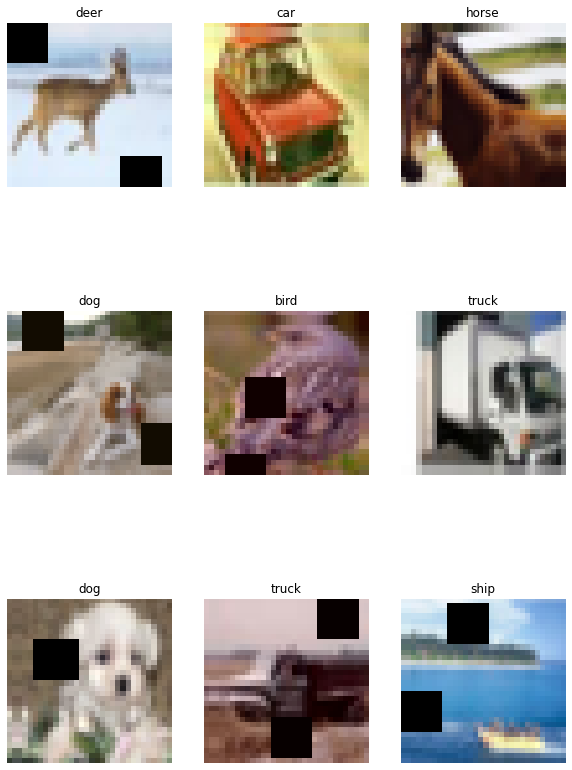

In [ ]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

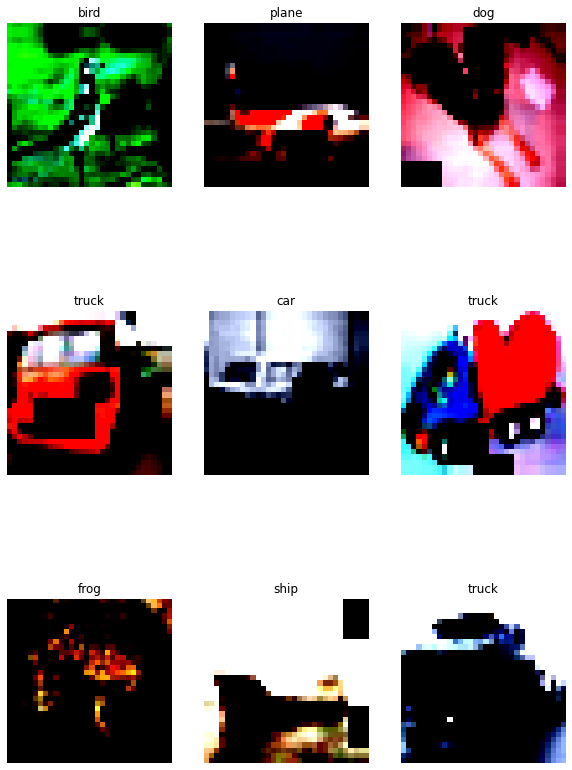

In [ ]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [ ]:

dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#model = BasicModel.Net().to(device)


model = RESNET.ResNet18().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [ ]:
#FIND BEST POSSIBLE LR 


In [ ]:
import torch.nn as nn
import torch.optim as optim
min_lr=1e-06
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=min_lr,momentum=Args.momentum,weight_decay=0.005 )
lr_finder = LRFinder(model, optimiser, criterion, device="cuda")


In [ ]:
# ## FIND BEST LR AND PLOT BETWEEN 10-6 and 1 
# lr_finder.range_test(trainloader, val_loader=testloader,start_lr=1e-06,end_lr=1, num_iter=500 ,step_mode="exp")
# _,best_descent_lr=lr_finder.plot()
# ## Extract Best LR with minimum losss 
# Best_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
# print("best LR With steepest descent ", best_descent_lr)
# print("best LR With minimum loss ",Best_lr)
# lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
# # FIND BEST LR AND PLOT BETWEEN 10-3 and 7e-02
# lr_finder = LRFinder(model, optimiser, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=testloader,start_lr=1e-03, end_lr=7e-02, num_iter=200 ,step_mode="exp")
# _,best_descent_lr=lr_finder.plot()
# ## Extract Best LR with minimum losss 
# Best_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
# print("best LR With steepest descent ", best_descent_lr)
# print("best LR With minimum loss ",Best_lr)
# lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
 1.10E-02


0.011

In [ ]:
#initialize loss , scheduler , optimizer 


In [ ]:
## **Initialise Loss funtion, Optimizer, Schedular**
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import OneCycleLR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02,momentum=0.9 ,weight_decay = 0.0001)
#scheduler = ReduceLROnPlateau(optimizer, patience = 3)
scheduler = OneCycleLR(optimizer, max_lr = 0.02, total_steps=None, epochs=30, steps_per_epoch=len(trainloader), pct_start=0.20, anneal_strategy='linear', cycle_momentum=False, base_momentum=0.85, max_momentum=0.95, div_factor=8,final_div_factor =1)

In [ ]:

# import torch.optim as optim
# from torch.optim.lr_scheduler import StepLR
# lossfunc = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=Args.learning_rate, momentum=Args.momentum,weight_decay=Args.lambda_l2)
# scheduler = StepLR(optimizer, step_size=Args.step_size, gamma=0.1)


In [ ]:
#Test
EPOCHS = Args.epochs

EPOCHS = 30
trainer = train.Trainer()
tester  = test.Tester()
Lr_track=[]
lossfunc=criterion

for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
  Lr_track.append(optimizer.param_groups[0]['lr'])
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, Args.lambda_l1,scheduler)
  tester.test(model, device, testloader)

test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.0025


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=1.3515962362289429 Batch_id=97 Accuracy=33.78: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -2.6473, Test Accuracy: 4520/10000 (45.20%)

EPOCH: 2 LR: 0.005421635434412266


Train set: Loss=1.146490216255188 Batch_id=97 Accuracy=52.50: 100%|██████████| 98/98 [00:57<00:00,  1.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -3.9252, Test Accuracy: 6005/10000 (60.05%)

EPOCH: 3 LR: 0.008343270868824531


Train set: Loss=0.9011284708976746 Batch_id=97 Accuracy=62.45: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -4.2514, Test Accuracy: 6142/10000 (61.42%)

EPOCH: 4 LR: 0.011264906303236798


Train set: Loss=0.7888839244842529 Batch_id=97 Accuracy=68.79: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -5.8380, Test Accuracy: 7160/10000 (71.60%)

EPOCH: 5 LR: 0.014186541737649064


Train set: Loss=0.7225390076637268 Batch_id=97 Accuracy=73.22: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.4852, Test Accuracy: 7108/10000 (71.08%)

EPOCH: 6 LR: 0.01710817717206133


Train set: Loss=0.646242082118988 Batch_id=97 Accuracy=76.66: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -6.8934, Test Accuracy: 6483/10000 (64.83%)

EPOCH: 7 LR: 0.019992559523809524


Train set: Loss=0.6600995659828186 Batch_id=97 Accuracy=79.07: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.2255, Test Accuracy: 7847/10000 (78.47%)

EPOCH: 8 LR: 0.019263392857142857


Train set: Loss=0.44905439019203186 Batch_id=97 Accuracy=81.71: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -7.9955, Test Accuracy: 8063/10000 (80.63%)

EPOCH: 9 LR: 0.01853422619047619


Train set: Loss=0.5046332478523254 Batch_id=97 Accuracy=83.57: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -8.4097, Test Accuracy: 7617/10000 (76.17%)

EPOCH: 10 LR: 0.017805059523809525


Train set: Loss=0.4486451745033264 Batch_id=97 Accuracy=85.06: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -8.5378, Test Accuracy: 8269/10000 (82.69%)

EPOCH: 11 LR: 0.01707589285714286


Train set: Loss=0.33885809779167175 Batch_id=97 Accuracy=86.37: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -9.2754, Test Accuracy: 8234/10000 (82.34%)

EPOCH: 12 LR: 0.01634672619047619


Train set: Loss=0.37741050124168396 Batch_id=97 Accuracy=87.40: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -9.7217, Test Accuracy: 8628/10000 (86.28%)

EPOCH: 13 LR: 0.015617559523809523


Train set: Loss=0.3951459228992462 Batch_id=97 Accuracy=88.56: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -9.9834, Test Accuracy: 8682/10000 (86.82%)

EPOCH: 14 LR: 0.014888392857142857


Train set: Loss=0.2246464341878891 Batch_id=97 Accuracy=89.29: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -9.8037, Test Accuracy: 8675/10000 (86.75%)

EPOCH: 15 LR: 0.01415922619047619


Train set: Loss=0.27907007932662964 Batch_id=97 Accuracy=90.12: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -10.9404, Test Accuracy: 8834/10000 (88.34%)

EPOCH: 16 LR: 0.013430059523809523


Train set: Loss=0.2615705132484436 Batch_id=97 Accuracy=90.77: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -11.2412, Test Accuracy: 8698/10000 (86.98%)

EPOCH: 17 LR: 0.012700892857142859


Train set: Loss=0.2336258888244629 Batch_id=97 Accuracy=91.66: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -11.4337, Test Accuracy: 8785/10000 (87.85%)

EPOCH: 18 LR: 0.01197172619047619


Train set: Loss=0.20464012026786804 Batch_id=97 Accuracy=92.33: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -11.2595, Test Accuracy: 8663/10000 (86.63%)

EPOCH: 19 LR: 0.011242559523809523


Train set: Loss=0.21062032878398895 Batch_id=97 Accuracy=92.89: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -12.1918, Test Accuracy: 8929/10000 (89.29%)

EPOCH: 20 LR: 0.010513392857142857


Train set: Loss=0.19680795073509216 Batch_id=97 Accuracy=93.25: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -11.6816, Test Accuracy: 8884/10000 (88.84%)

EPOCH: 21 LR: 0.009784226190476189


Train set: Loss=0.20065905153751373 Batch_id=97 Accuracy=93.95: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -12.1600, Test Accuracy: 8889/10000 (88.89%)

EPOCH: 22 LR: 0.009055059523809523


Train set: Loss=0.20739607512950897 Batch_id=97 Accuracy=94.45: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -12.5505, Test Accuracy: 8838/10000 (88.38%)

EPOCH: 23 LR: 0.008325892857142856


Train set: Loss=0.20224487781524658 Batch_id=97 Accuracy=94.89: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -12.6026, Test Accuracy: 8933/10000 (89.33%)

EPOCH: 24 LR: 0.0075967261904761885


Train set: Loss=0.1550031304359436 Batch_id=97 Accuracy=95.37: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -13.1918, Test Accuracy: 8930/10000 (89.30%)

EPOCH: 25 LR: 0.006867559523809522


Train set: Loss=0.10029073059558868 Batch_id=97 Accuracy=95.71: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -13.0377, Test Accuracy: 8983/10000 (89.83%)

EPOCH: 26 LR: 0.006138392857142856


Train set: Loss=0.08795472234487534 Batch_id=97 Accuracy=96.16: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -13.2893, Test Accuracy: 9014/10000 (90.14%)

EPOCH: 27 LR: 0.005409226190476188


Train set: Loss=0.07583583891391754 Batch_id=97 Accuracy=96.38: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -13.5795, Test Accuracy: 9036/10000 (90.36%)

EPOCH: 28 LR: 0.004680059523809522


Train set: Loss=0.09627912193536758 Batch_id=97 Accuracy=96.90: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -13.8005, Test Accuracy: 9095/10000 (90.95%)

EPOCH: 29 LR: 0.003950892857142858


Train set: Loss=0.07003683596849442 Batch_id=97 Accuracy=97.26: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: -13.8862, Test Accuracy: 9065/10000 (90.65%)

EPOCH: 30 LR: 0.003221726190476188


Train set: Loss=0.10211928933858871 Batch_id=97 Accuracy=97.52: 100%|██████████| 98/98 [00:58<00:00,  1.66it/s]



Test set: Average loss: -13.7949, Test Accuracy: 9102/10000 (91.02%)



In [ ]:
new_train_acc,new_train_loss=useful_utils.modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader)

train_acc_mod=new_train_acc
train_losses_mod=new_train_loss
len(train_acc_mod),len(train_losses_mod),len(new_train_loss),len(Lr_track)

(30, 30, 30, 30)

In [ ]:
import matplotlib.pyplot as plt
def plot_lr_metric(lr_metric):
    plt.figure(figsize=(7, 5))
    plt.plot(lr_metric)
    plt.title('Learning Rate')
    plt.show()


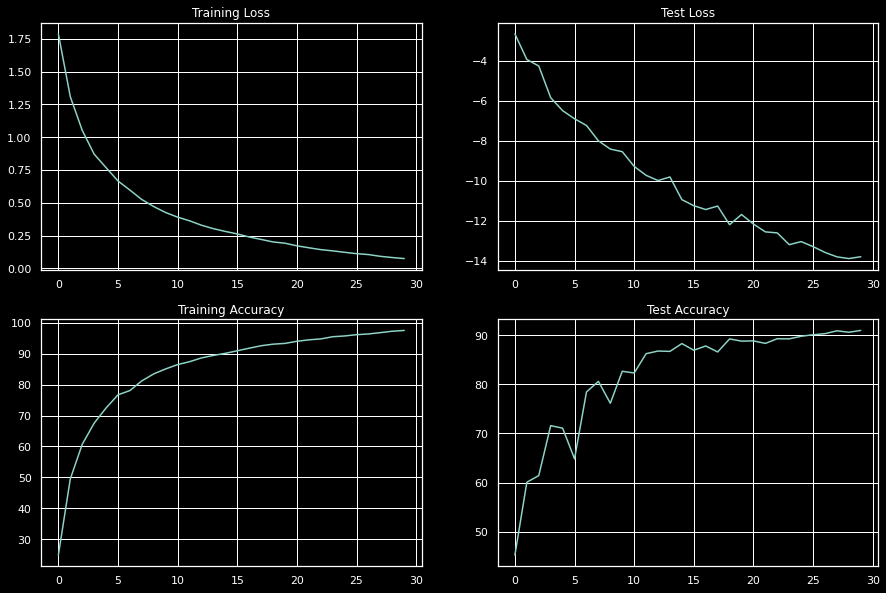

In [ ]:
def plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc):
  import seaborn as sns
  import matplotlib.pyplot as plt
  sns.set()
  plt.style.use("dark_background")

  fig, axs = plt.subplots(2,2,figsize=(15,10))
  axs[0, 0].plot(train_losses_mod)
  axs[0, 0].set_title("Training Loss")
  axs[1, 0].plot(train_acc_mod)
  axs[1, 0].set_title("Training Accuracy")
  axs[0, 1].plot(test_losses)
  axs[0, 1].set_title("Test Loss")
  axs[1, 1].plot(test_acc)
  axs[1, 1].set_title("Test Accuracy")
  plt.show()

plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc)

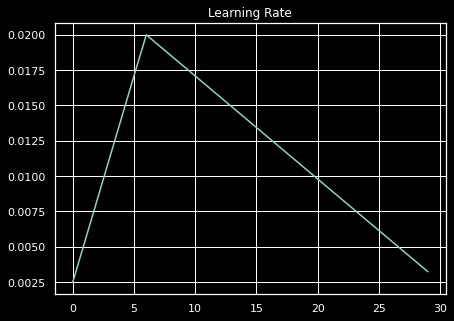

In [ ]:

plot_lr_metric(Lr_track)


In [ ]:

torch.save(model,'./data/cifar')


In [ ]:
#load the model
model = torch.load('./data/cifar')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [ ]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 80 %
Accuracy of   car : 88 %
Accuracy of  bird : 83 %
Accuracy of   cat : 100 %
Accuracy of  deer : 83 %
Accuracy of   dog : 72 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

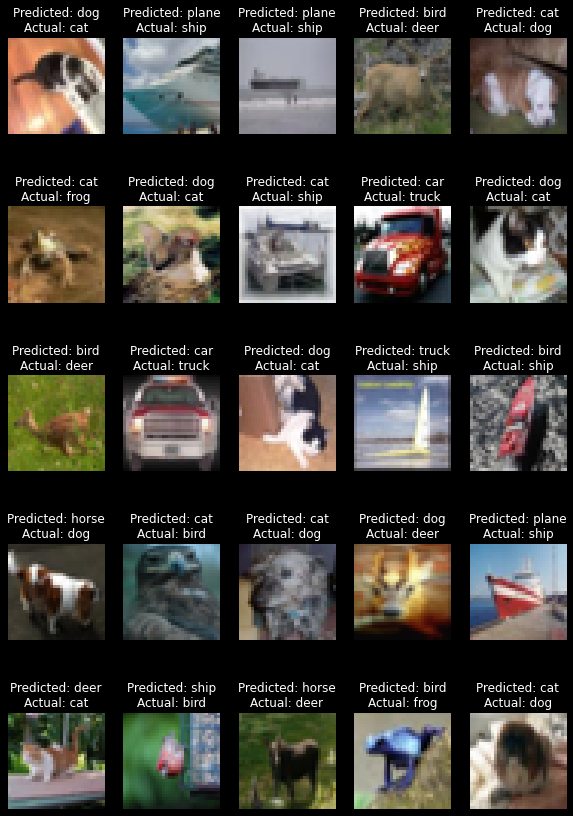

In [ ]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [ ]:
## GRAD CAM 


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


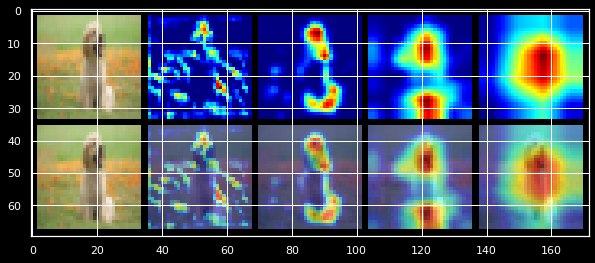

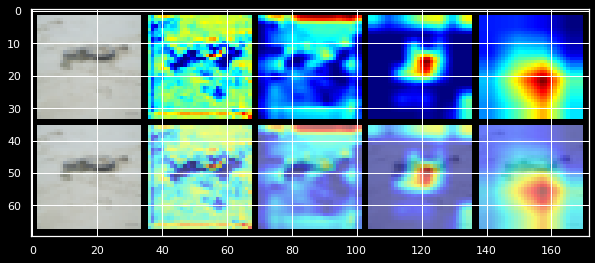

In [ ]:
#GRAD CAM for user defined images
path='/content/SWAG_DNN/img'
import PIL
img_name =[path+'/dog.jpg',path+'/snake.jpg']
gradcam.grad_cam_for_user_defined_images(img_name,device,mean,std,model)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

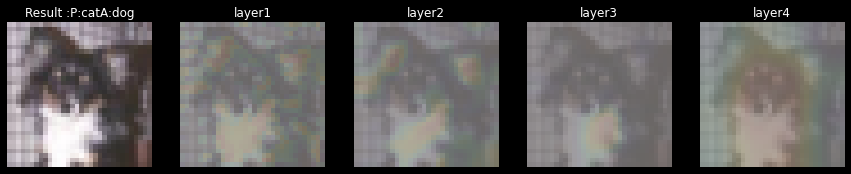

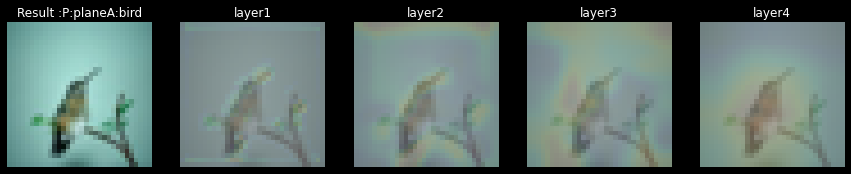

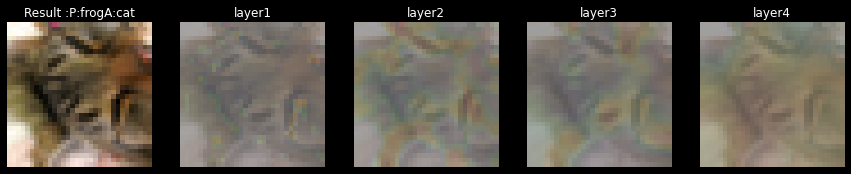

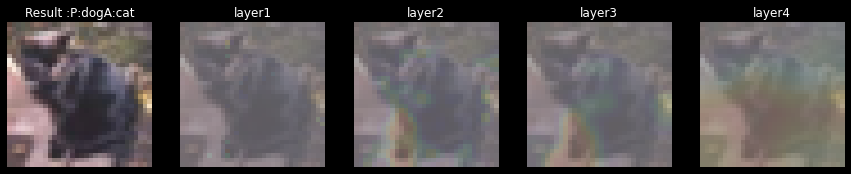

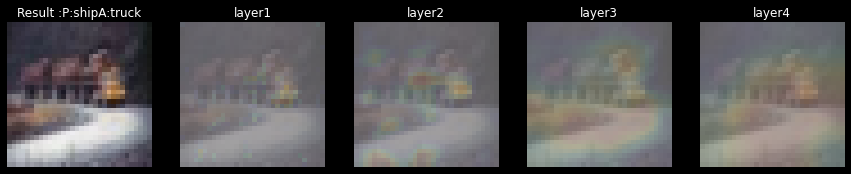

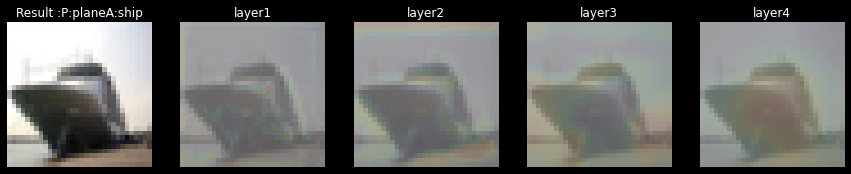

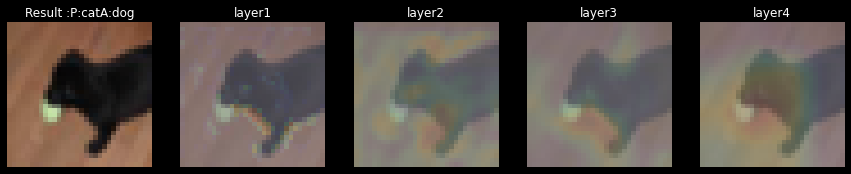

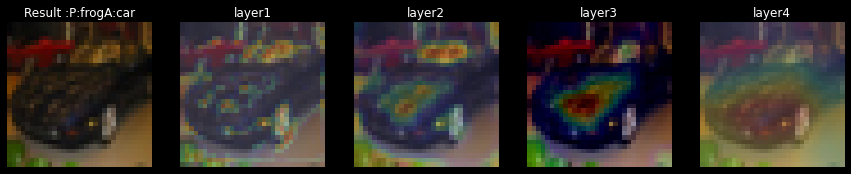

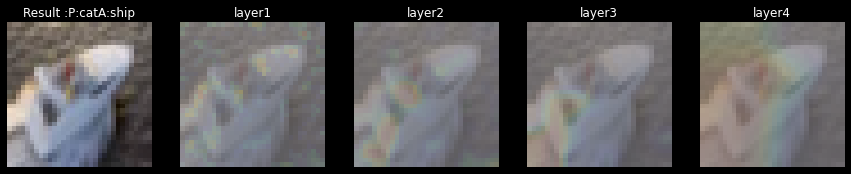

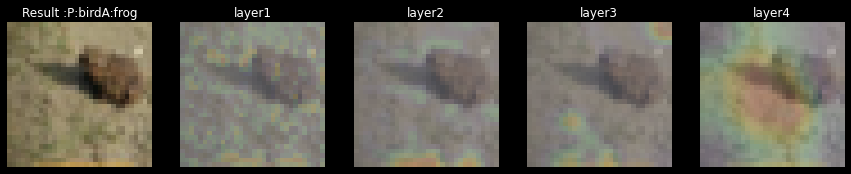

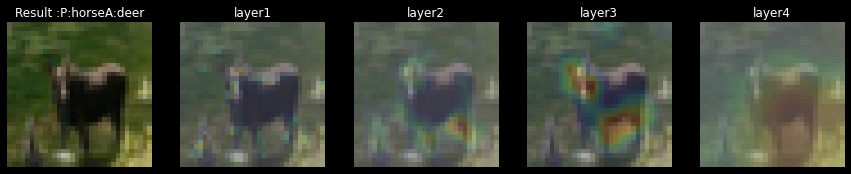

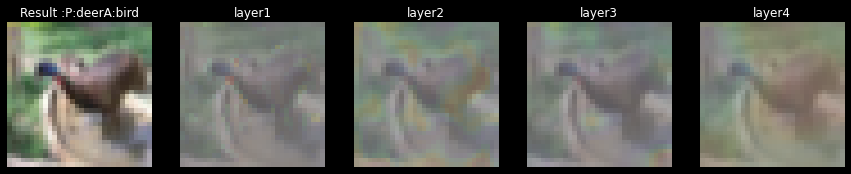

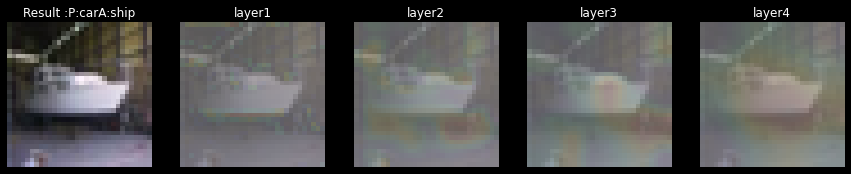

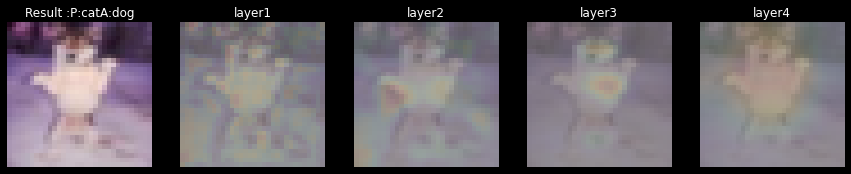

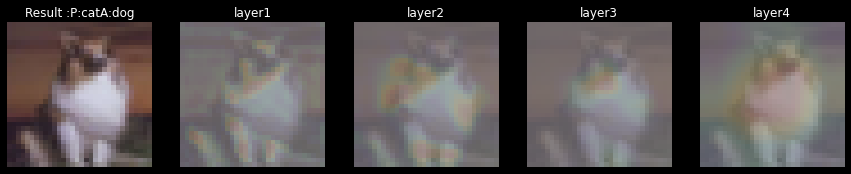

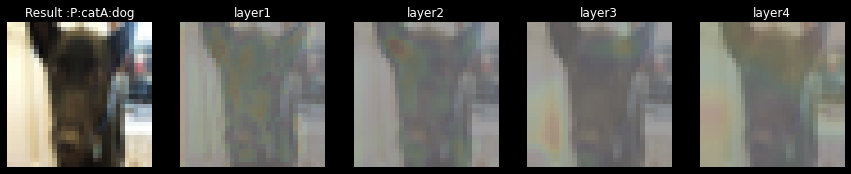

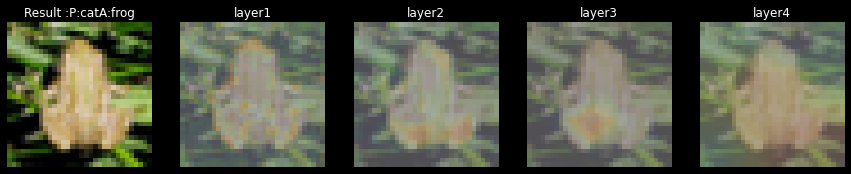

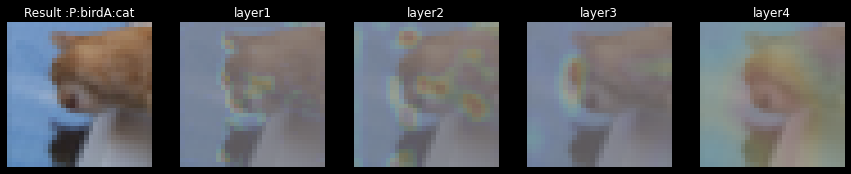

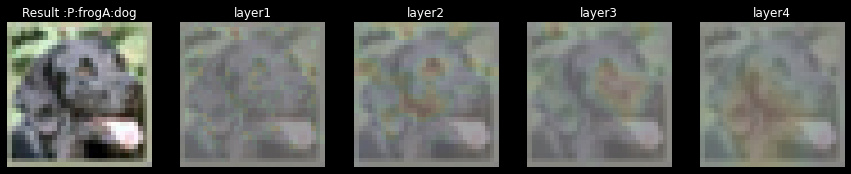

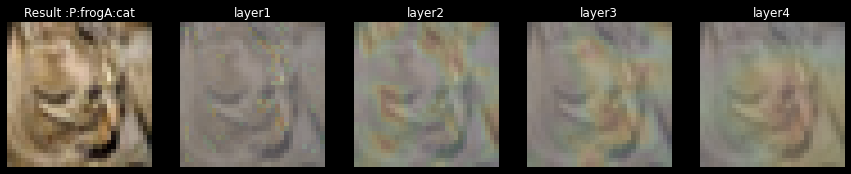

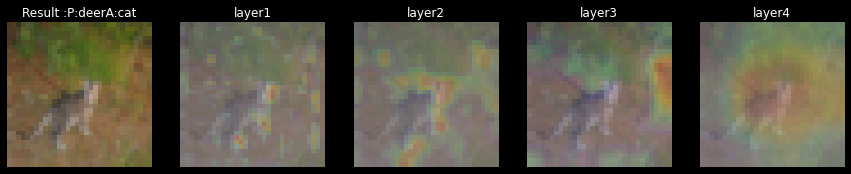

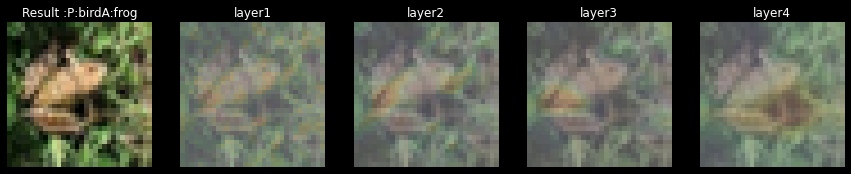

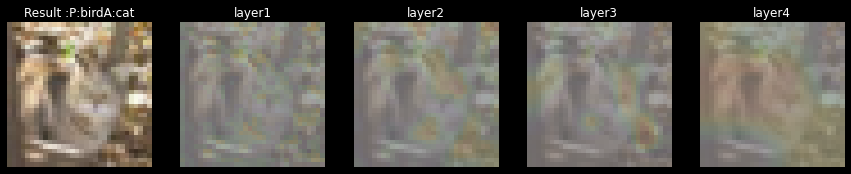

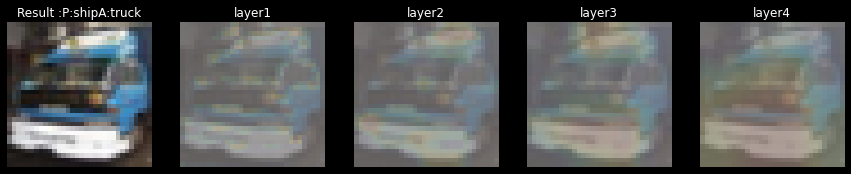

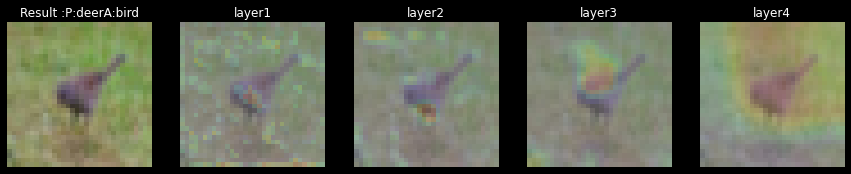

In [ ]:
missed_images, predicted, actual = plot_misclassified_image.get_misclassified(model,testloader,device)

#lets see gradcam of  4 misclassified images 
gradcam.show_gradcam_for_n_images_only_result(25,missed_images,predicted,actual,classes,model,device,mean,std)

In [ ]:
proper_images, predicted, actual = plot_misclassified_image.get_properclassified(model,testloader,device)

#lets see gradcam of  4 misclassified images 
gradcam.show_gradcam_for_n_images(4,proper_images,predicted,actual,classes,model,device,mean,std)